 #                                            Titanic DataSet
                                            
## Some of the questions on examing the Data set:
a. What factors made people more likely to survive?
b. Based on gender, who surived most male or female?
c. Average of survival rate for both men and women?
d. Which age group survived most?
e. In which class(Pclass) people are more likely to survive?
f. Does the survival rate depend on Fare means people who paid more fare are more likely to survive?
g. Is there positive or negative correlation between passengers survived and other factors?

In the titanic-data set, the number of passengers survived is most significant. Hence each column is compared to 'Survived' column for analysis.      

## Analysis:
After examing the dataset the next step is to read the titanic-data.csv file and clean up the data types in the data table. The code to do the above process is as follows:

In [1]:
#read titanic-data csv file
import csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = csv.DictReader(f)
        return list(reader)

titanicdata = read_csv('titanic-data.csv')


In [2]:
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_float(i):
    if i == '':
        return None
    else:
        return i
    
# Takes a string which is either an empty string or string,
# and returns string or None.
def parse_maybe_string(i):
    if i == '':
        return None
    else:
        return i

In [3]:
# Clean up the data types in the data table
for data in titanicdata:
    data['Age'] = parse_maybe_float(data['Age'])
    data['Cabin'] = parse_maybe_string(data['Cabin'])
    data['Embarked'] = parse_maybe_string(data['Embarked'])
titanicdata[0]
    

{'Age': '22',
 'Cabin': None,
 'Embarked': 'S',
 'Fare': '7.25',
 'Name': 'Braund, Mr. Owen Harris',
 'Parch': '0',
 'PassengerId': '1',
 'Pclass': '3',
 'Sex': 'male',
 'SibSp': '1',
 'Survived': '0',
 'Ticket': 'A/5 21171'}

Using Numpy arrays, Pandas Series and DataFrames for further investigation on data set. Each column is examined separately for analyzing the data. On observing the dataset, PassengerId, Ticket and Name are the factors that does not provide any information that affects the survival of passengers. Most probably, passengers might have unique id, name and ticket. The columns Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Cabin  and Embarked are considered for further data analysis to find out whether these factors have an impact on passenger survival during the disaster. 

In [69]:
#To find the first five rows of dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Gender:
The column 'Sex' is considered to find out the total number of female and male passengers survived as well as the average of survived passengers during the disaster. The code and visualization of data is as follows:

In [2]:
#passengers who survived in titanic_df.head()
num_passenger_survived = (titanic_df.head()['Survived'] != 0).sum()
print num_passenger_survived

3


In [3]:
#passengers who didn't survive in titanic_df.head()
num_passenger_not_survived = (titanic_df.head()['Survived'] == 0).sum()
print num_passenger_not_survived

2


In [4]:
#To find the number of passengers survived based on gender
titanic_df.groupby(['Sex'])['Survived'].sum()


Sex
female    233
male      109
Name: Survived, dtype: int64

In [5]:
#Gives the passenger count based on gender
titanic_df.groupby(['Sex'])['Survived'].count()
    

Sex
female    314
male      577
Name: Survived, dtype: int64

In [6]:
#Gives the survived passenger mean based on gender
titanic_df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

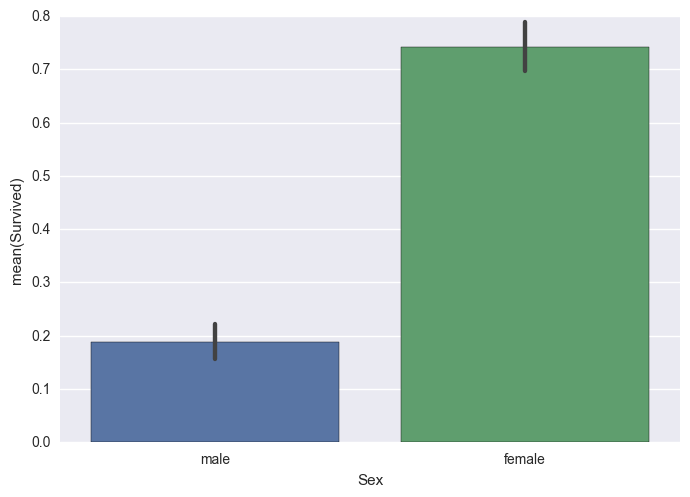

In [25]:
#Plot that shows female passengers survived more than male passengers
sns.barplot(x = "Sex", y = 'Survived', data = titanic_df )
plt.show()

### Fare:
We are calculating mean and standard deviation of fare for survived and non survived passengers to find out the average fare paid by the survived and non survived passengers. The code and plot are as follows:

In [8]:
#To determine the Fare for survived and non survived passengers
#Mean and Standard deviation for survived passenger fare and not survived passenger fare
survived_passenger_fare_mean = titanic_df['Fare'][titanic_df['Survived'] != 0].mean()
notsurvived_passenger_fare_mean = titanic_df['Fare'][titanic_df['Survived'] == 0].mean()
survived_passenger_fare_std = titanic_df['Fare'][titanic_df['Survived'] != 0].std()
notsurvived_passenger_fare_std = titanic_df['Fare'][titanic_df['Survived'] == 0].std()


In [9]:
print "Mean of survived and not survived passenger fare"
print survived_passenger_fare_mean
print notsurvived_passenger_fare_mean
print "SD of survived and not survived passenger fare"
print survived_passenger_fare_std 
print notsurvived_passenger_fare_std

Mean of survived and not survived passenger fare
48.3954076023
22.1178868852
SD of survived and not survived passenger fare
66.5969981183
31.3882065306


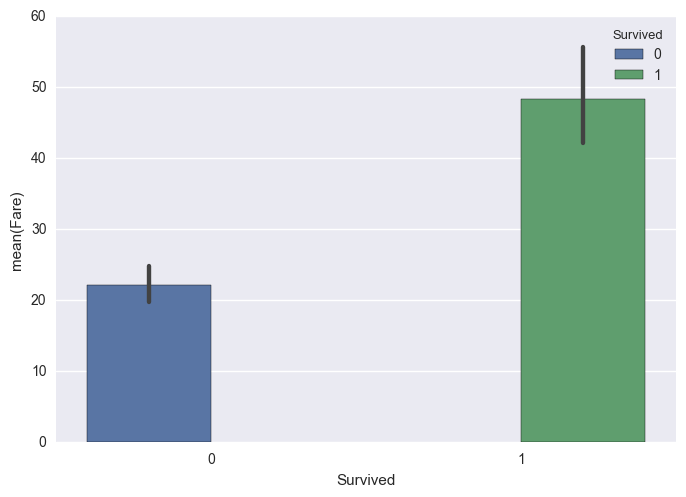

In [33]:
#barplot
sns.barplot(x = "Survived", y = 'Fare', data = titanic_df, hue = 'Survived')
plt.show()

### Pclass:
We are trying to find the number of survived passengers in each Pclass as well as the mean of survived passengers in each Pclass.  The code and visulaization is as follows:

In [11]:
#Gives the survived passenger count in Pclass
titanic_df.groupby(['Pclass'])['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [12]:
#Gives the average of survived passengers in each class of Pclass
titanic_df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

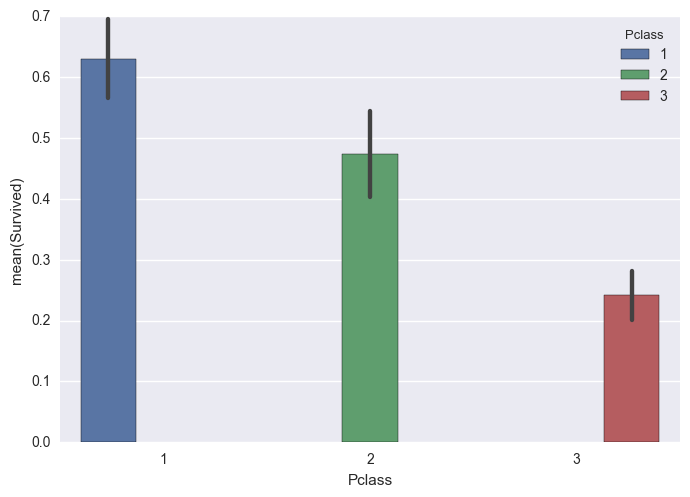

In [30]:
#barplot
sns.barplot(x = "Pclass", y = 'Survived', data = titanic_df, hue="Pclass" )
plt.show()

### Age:
By considering Age as a factor we can find out which age group survived most during the incident. However, there are more passengers with NAN values whose age is not mentioned in dataset. The values(NAN) are filled with 0's for prediction. Mean and standard deviation is calculated and visualization for Age group, survived passenger's age and not survived passenger's is shown in the plot.


In [34]:
# fill NAN values with 0's for missing data 
titanic_df['Age'] = titanic_df['Age'].fillna(0)
# Age is converted from float to int because we always mark the age to the nearest integer down(floor)
titanic_df['Age'] = titanic_df['Age'].astype(int)


In [35]:
# Mean and Standard Deviation for Age
passenger_age_mean = titanic_df['Age'].mean()
passenger_age_std = titanic_df['Age'].std()
print passenger_age_mean
print passenger_age_std

23.7833894501
17.5973438421


In [22]:
#Survived passengers Age count
titanic_df.groupby(['Age'])['Survived'].count()

Age
0     184
1       7
2      10
3       6
4      10
5       4
6       3
7       3
8       4
9       8
10      2
11      4
12      1
13      2
14      7
15      5
16     17
17     13
18     26
19     25
20     16
21     24
22     27
23     16
24     31
25     23
26     18
27     18
28     27
29     20
     ... 
41      6
42     13
43      5
44      9
45     14
46      3
47      9
48      9
49      6
50     10
51      7
52      6
53      1
54      8
55      3
56      4
57      2
58      5
59      2
60      4
61      3
62      4
63      2
64      2
65      3
66      1
70      3
71      2
74      1
80      1
Name: Survived, dtype: int64

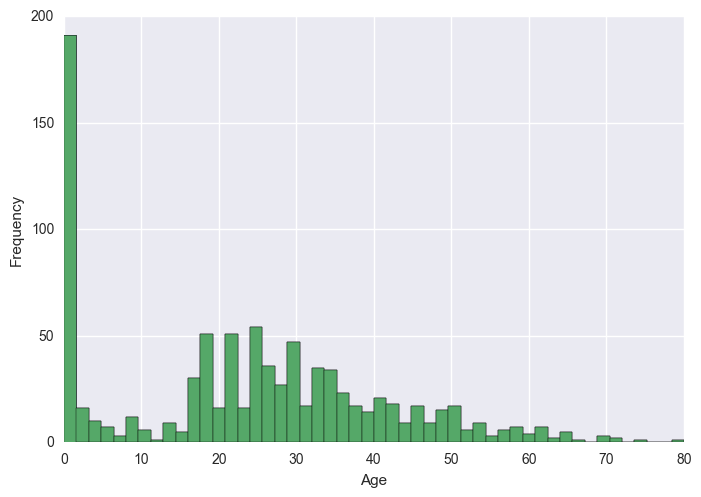

In [29]:
#Survived passengers based on Age
titanic_df['Age'].plot.hist(bins = 50).set_xlabel("Age")
plt.show()

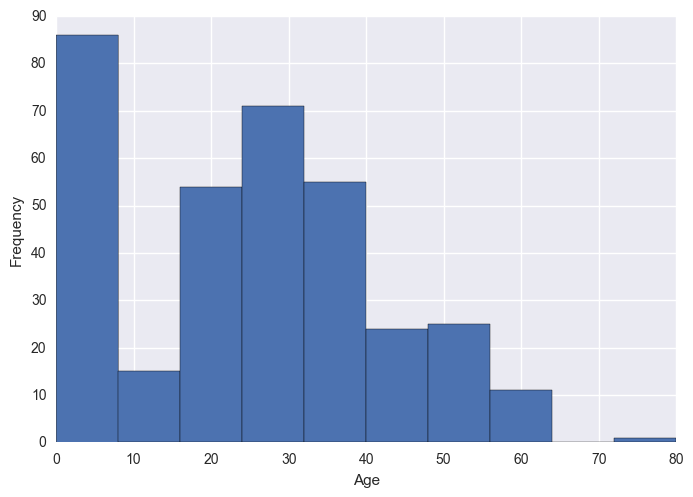

In [19]:
#Age of survived passengers 
titanic_df[titanic_df["Survived"] == 1]["Age"].plot(kind="hist").set_xlabel("Age")
plt.show()

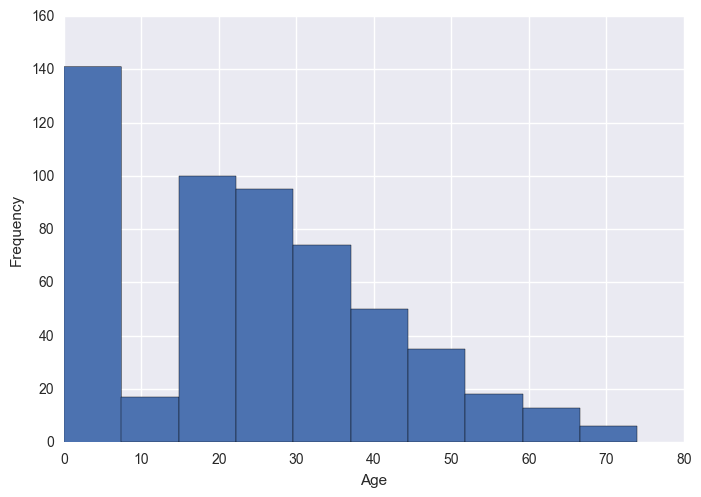

In [20]:
#Age of not survived passengers
titanic_df[titanic_df["Survived"] == 0]["Age"].plot(kind="hist").set_xlabel("Age")
plt.show()

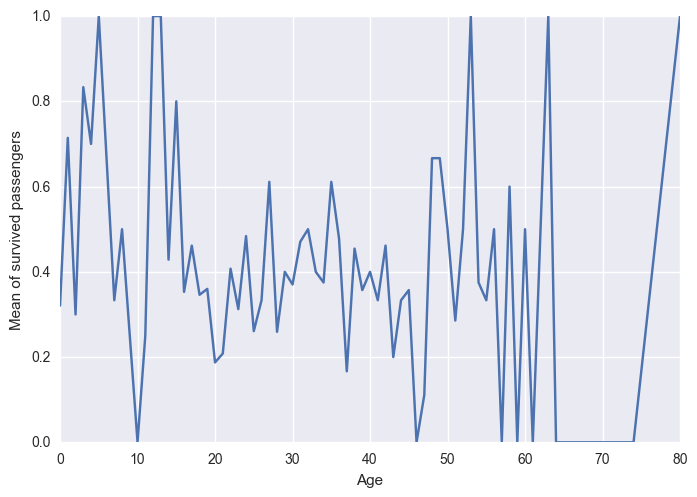

In [23]:
# Mean of survived passengers by Age
passenger_age_mean = titanic_df.groupby(['Age'])['Survived'].mean()
passenger_age_mean.plot().set_ylabel("Mean of survived passengers")
plt.show()

### Family = Parch + SibSp:
The columns Parch: Number of Parents/Children aboard and SibSp: Number of Siblings/Spouses aboard so both can be 
combined to form family. We combine these two columns to know whether a passenger with family helped her/him to survive or not. A condition is made to the 'Family' column that states if the value is 1 passenger have family or else no family(0). The code and visualization is as follows:

In [71]:
 # Concatenation of two columns in titanic dataframe
titanic_df['Family'] = titanic_df['Parch'] + titanic_df['SibSp']

print titanic_df['Family'].head()

0    1
1    1
2    0
3    1
4    0
Name: Family, dtype: int64


In [72]:
#condition to check the family column 
titanic_df.loc[titanic_df['Family']>1,'Family']=1

In [73]:
# 0 represents passengers with no parents, children, siblings and spouses
# 1 represents passengers have either one of them
titanic_df['Family'].value_counts()

0    537
1    354
Name: Family, dtype: int64

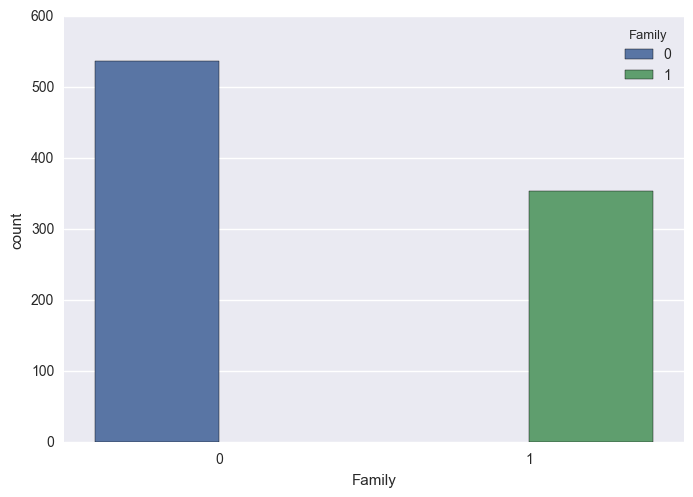

In [74]:
#plot to show the passengers with family and without family
#titanic_df['Family'].value_counts().plot(kind="bar").set_xlabel("Survived")
sns.countplot(x = "Family", data = titanic_df, hue="Family" )
plt.show()

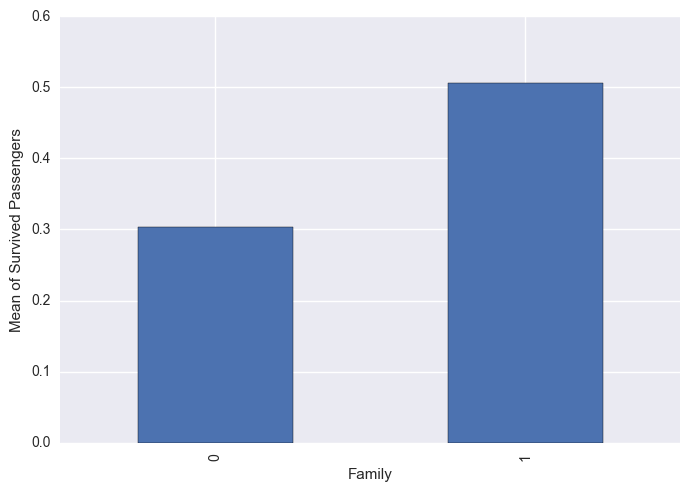

In [75]:
# Mean of survived passengers by Family
passenger_family_mean = titanic_df.groupby(['Family'])['Survived'].mean()
passenger_family_mean.plot(kind="bar").set_ylabel("Mean of Survived Passengers")
plt.show()

### Embarked:
By considering 'Embarked' as a factor we are trying to find out in which Embarkment people are most likely to survive.
There are two missing values in Embarked column which are filled with None values. The average of survived passengers in each 'Embarked' station is calculated and plot is shown below:

In [45]:
# Passengers with id 62 and 830 are missing and those are filled with None.
titanic_df['Embarked'].fillna('None').value_counts()

S       644
C       168
Q        77
None      2
Name: Embarked, dtype: int64

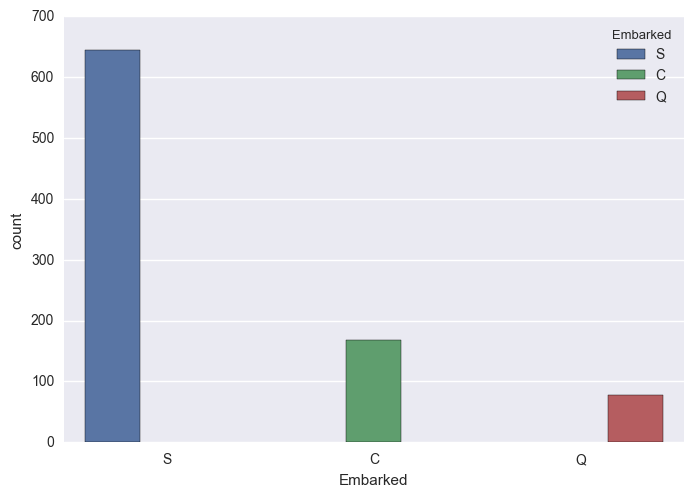

In [49]:
# plot that shows the passenger count in each Embarkment.
#titanic_df['Embarked'].fillna('None').value_counts().plot(kind="bar").set_ylabel("Passenger Count")
#plt.show()
sns.countplot(x = "Embarked", data = titanic_df, hue="Embarked" )
plt.show()

In [35]:
# Mean of survived passengers in each Embarked station
titanic_df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

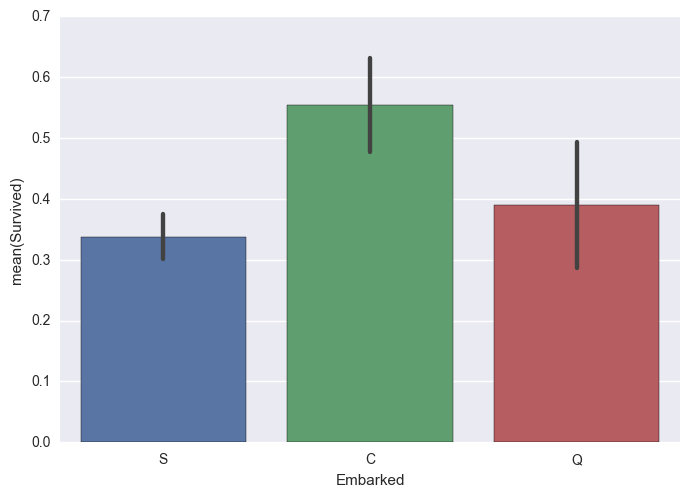

In [36]:
#barplot
sns.barplot(x = "Embarked", y = 'Survived', data = titanic_df)
plt.show()

### Cabin:
In 'Cabin' column there are lot of NAN values so we have very less information to do further analysis. If NAN values are filled with 0's or None values,  the information we get after analysis might not give accurate results. Hence, 'Cabin' column is omitted to do further analysis.

In [50]:
#Cabin
titanic_df['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [79]:
titanic_df['Cabin'][0:30]

0             NaN
1             C85
2             NaN
3            C123
4             NaN
5             NaN
6             E46
7             NaN
8             NaN
9             NaN
10             G6
11           C103
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            D56
22            NaN
23             A6
24            NaN
25            NaN
26            NaN
27    C23 C25 C27
28            NaN
29            NaN
Name: Cabin, dtype: object

In [80]:
titanic_df['Cabin'].fillna('0').value_counts()

0              687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
E101             3
F33              3
C22 C26          3
D                3
C68              2
D20              2
E121             2
B18              2
B77              2
E8               2
E24              2
C65              2
D26              2
B58 B60          2
E25              2
B20              2
C93              2
C126             2
E44              2
B22              2
C78              2
B28              2
C123             2
F G73            2
C124             2
              ... 
C45              1
F G63            1
D6               1
D56              1
C101             1
C54              1
D28              1
D37              1
B102             1
D30              1
E17              1
E58              1
F E69            1
D10 D12          1
E50              1
A14              1
C91              1
A16              1
B38              1
B39              1
C95              1
B78         

### Correlation:
Correlation is computed between the columns in the dataset to know whether the variables are positively correlated or negatively correlated. 

In [76]:
def correlation(x, y):
    #correlation = average of (x in standard units) times (y in standard units)
    standardize_x = (x - x.mean())/x.std(ddof=0)
    standardize_y = (y - y.mean())/y.std(ddof=0)
        
    return (standardize_x * standardize_y).mean()

survived = titanic_df['Survived']
pclass = titanic_df['Pclass']
family = titanic_df['Family']
fare = titanic_df['Fare']
age = titanic_df['Age']

print correlation(survived, fare)
print correlation(survived, pclass)
print correlation(survived, family)
print correlation(survived, age)
print correlation(pclass, fare)

0.257306522385
-0.338481035961
0.2033670857
-0.0779826784139
-0.549499619944


In [77]:
# Drop two columns SibSp and Parch
titanic_df = titanic_df.drop(['SibSp', 'Parch'], axis = 1)
#Correlation
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,Fare,Family
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,-0.057462
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,-0.135207
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.198270
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,0.271832
Family,-0.057462,0.203367,-0.135207,-0.198270,0.271832,1.000000


### Limitations:
In the titanic-dataset, due to lot of missing values in the column 'Cabin' and there are multiple Cabin names in the same row (e.g., row 27: “C23 C25 C27”) which made difficult to find the passengers survived in each Cabin. Hence, we couldn't do further analysis on this column. This is shown under Cabin cell.


### Conclusion:
Based on Analysis, the solutions to above questions are as follows:
a. Pclass, Age, Fare and Family are some of the factors that made people most likely to survive.
b. Female passengers survived most. 
   Female : 233, Male : 109
c. Average of female passenger survival is higher than male passengers. 
   Mean of Female: 0.742038,
   Mean of Male  : 0.188908
d. Age group between 18 to 40 survived most.
e. In Pclass1, people are most likely to survive.
   Pclass  Mean
      1    0.629630
      2    0.472826
      3    0.242363
f. Mean of survived passenger fare: 48.3954076023
   Mean of not survived passenger fare: 22.1178868852
   SD of survived passenger fare: 66.5969981183 
   SD of not survived passenger fare: 31.3882065306
   correlation(survived, fare): 0.257306522385
   Based on computation, Mean and SD of survived passenger fare is more than not survived as well as Survived and Fare    has highest positive correlation compared to other variables(factors).
g. There are both positive and negative correlation between survived and other variables as shown in the table. Based    on the computation results, there is positive correlation for fare, family and age withrespect to survived         passengers. Negative correlation exists between (survived, fare) and (pclass, fare)


### References:
1. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
3. https://seaborn.pydata.org/generated/seaborn.barplot.html
4. https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic
5. https://www.kaggle.com/c/titanic
